<a href="https://colab.research.google.com/github/cxmedeiros/RedesNeurais/blob/main/projeto_mlp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠 Projeto MLP: Redes Neurais
##### Grupo: Kailane Felix (kefs), Gabriel Lopes (gls6), Camila Xavier (cxm), Luisa Mendes (mlmsp), Camila Siqueira (csl2)


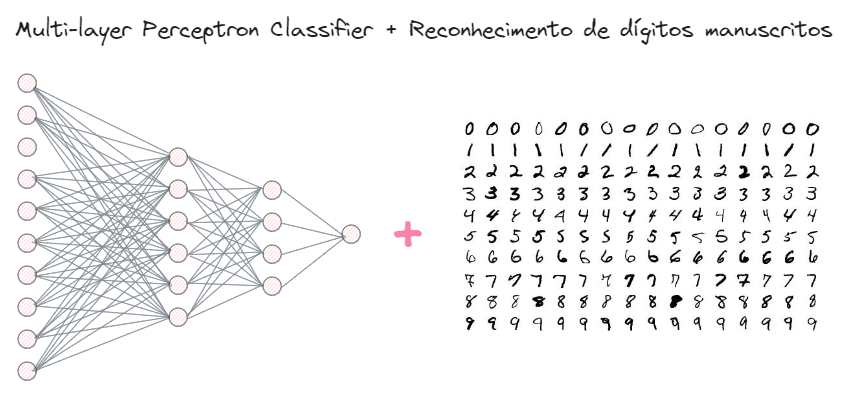

#### 🎯 Objetivos:

Neste projeto, usaremos um classificador MLP em um conjunto de dados de imagens de dígitos manuscritos com o objetivo de identificar quais são os algarismos corretamente.

### Como funciona uma rede MLP?

Uma rede MLP (Multilayer Perceptron) é uma arquitetura clássica de rede neural artificial, conhecida como perceptron de múltiplas camadas. Ela é composta por várias camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio em uma camada está conectado a todos os neurônios da camada seguinte, formando uma estrutura de rede densamente conectada. Essas conexões são representadas por pesos, que são ajustados durante o treinamento da rede para otimizar seu desempenho.


**Camada de entrada:**

A camada de entrada recebe os dados de entrada para a rede neural, que geralmente são vetores de características numéricas.

**Camadas ocultas:**

As camadas ocultas estão localizadas entre a camada de entrada e a camada de saída.
Cada neurônio em uma camada oculta recebe como entrada os valores dos neurônios da camada anterior, ponderados pelos pesos correspondentes.
Em seguida, o neurônio aplica uma função de ativação para produzir uma saída. Funções de ativação comuns incluem a função sigmoide (como a função logística) ou a função ReLU (unidade linear retificada).
A passagem dos dados através das camadas ocultas permite que a rede aprenda representações não lineares e capturar relações complexas nos dados.

**Camada de saída:**

A camada de saída recebe as saídas das camadas ocultas como entrada.
Cada neurônio na camada de saída produz uma resposta correspondente à tarefa específica que a rede está sendo treinada para realizar.
Dependendo do tipo de problema, pode haver diferentes funções de ativação na camada de saída. Por exemplo, para um problema de classificação binária, pode ser usada uma função sigmoide, enquanto para um problema de classificação multiclasse, pode ser usada a função softmax.

**Treinamento:**

Durante o treinamento, os pesos da rede são ajustados para minimizar uma função de perda, que mede o quão bem a rede está realizando a tarefa.
O algoritmo de treinamento mais comum para redes MLP é o algoritmo de retropropagação (backpropagation), que utiliza o gradiente descendente para atualizar os pesos da rede de forma iterativa.
O processo de treinamento envolve propagar os dados de entrada pela rede, calcular as saídas, comparar com os rótulos verdadeiros e ajustar os pesos com base nos erros cometidos.

**Em resumo:**

A capacidade de uma rede MLP em aprender a partir de dados e realizar tarefas de classificação, regressão ou outras tarefas depende da escolha apropriada da arquitetura da rede, funções de ativação, algoritmo de treinamento e ajuste dos hiperparâmetros relevantes.

É importante ressaltar que as redes MLP são uma das muitas arquiteturas de rede neural disponíveis e têm sido amplamente utilizadas como uma base fundamental para o desenvolvimento de modelos mais complexos e avançados.

#### ✅ Checklist:

- Hiperparâmetros que podem ser variados no MLP
  - Drop-out ✅
  - Tamanho da rede ✅
  - Taxa de aprendizagem ✅
  - Função de ativação ✅
  - Algoritmo de aprendizagem ✅
- Métricas para avaliar
  - Taxas de acerto por cada classe ✅
  - Acurácia, precision, recall totais✅
- Relatório descrevendo os experimentos experimentação comentada e relatado os resultados de melhorias/perdas de desempenho

#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#### 🎲 Importando os dados

In [ ]:
def get_mnist():
    # The code to download the mnist data original came from
    # https://cntk.ai/pythondocs/CNTK_103A_MNIST_DataLoader.html

    import gzip
    import os
    import struct

    from urllib.request import urlretrieve

    def load_data(src, num_samples):    #carregar os dados de imagem MNIST
        print("Downloading " + src)
        gzfname, h = urlretrieve(src, "./delete.me")
        print("Done.")
        try:
            with gzip.open(gzfname) as gz:
                n = struct.unpack("I", gz.read(4))
                # Read magic number.
                if n[0] != 0x3080000:
                    raise Exception("Invalid file: unexpected magic number.")
                # Read number of entries.
                n = struct.unpack(">I", gz.read(4))[0]
                if n != num_samples:
                    raise Exception(
                        "Invalid file: expected {0} entries.".format(num_samples)
                    )
                crow = struct.unpack(">I", gz.read(4))[0]
                ccol = struct.unpack(">I", gz.read(4))[0]
                if crow != 28 or ccol != 28:
                    raise Exception(
                        "Invalid file: expected 28 rows/cols per image."
                    )
                # Read data.
                res = np.frombuffer(
                    gz.read(num_samples * crow * ccol), dtype=np.uint8
                )
        finally:
            os.remove(gzfname)
        return res.reshape((num_samples, crow, ccol)) / 256  #a matriz é remodelada para ter a forma correta


    def load_labels(src, num_samples):  #carregar os rótulos correspondentes aos dados MNIST
        print("Downloading " + src)
        gzfname, h = urlretrieve(src, "./delete.me")
        print("Done.")
        try:
            with gzip.open(gzfname) as gz:
                n = struct.unpack("I", gz.read(4))
                # Read magic number.
                if n[0] != 0x1080000:
                    raise Exception("Invalid file: unexpected magic number.")
                # Read number of entries.
                n = struct.unpack(">I", gz.read(4))
                if n[0] != num_samples:
                    raise Exception(
                        "Invalid file: expected {0} rows.".format(num_samples)
                    )
                # Read labels.
                res = np.frombuffer(gz.read(num_samples), dtype=np.uint8)
        finally:
            os.remove(gzfname)
        return res.reshape((num_samples))


    def try_download(data_source, label_source, num_samples):
        data = load_data(data_source, num_samples)
        labels = load_labels(label_source, num_samples)
        return data, labels

    # Not sure why, but yann lecun's website does no longer support
    # simple downloader. (e.g. urlretrieve and wget fail, while curl work)
    # Since not everyone has linux, use a mirror from uni server.
    #     server = 'http://yann.lecun.com/exdb/mnist'
    server = 'https://raw.githubusercontent.com/fgnt/mnist/master'

    # URLs for the train image and label data
    url_train_image = f'{server}/train-images-idx3-ubyte.gz'
    url_train_labels = f'{server}/train-labels-idx1-ubyte.gz'
    num_train_samples = 60000

    print("Downloading train data")
    train_features, train_labels = try_download(url_train_image, url_train_labels, num_train_samples)

    # URLs for the test image and label data
    url_test_image = f'{server}/t10k-images-idx3-ubyte.gz'
    url_test_labels = f'{server}/t10k-labels-idx1-ubyte.gz'
    num_test_samples = 10000

    print("Downloading test data")
    test_features, test_labels = try_download(url_test_image, url_test_labels, num_test_samples)

    return train_features, train_labels, test_features, test_labels

In [ ]:
train_features, train_labels, test_features, test_labels = get_mnist()

Done.
Done.
Done.
Done.


#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

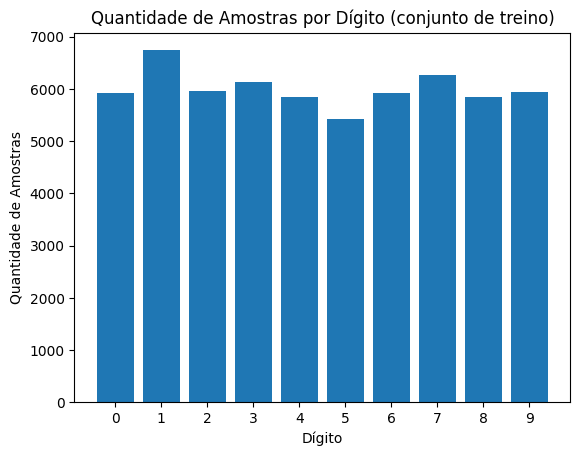

In [ ]:
unique_digits, counts = np.unique(train_labels, return_counts=True)

plt.bar(unique_digits, counts)
plt.xlabel('Dígito')
plt.ylabel('Quantidade de Amostras')
plt.title('Quantidade de Amostras por Dígito (conjunto de treino)')
plt.xticks(unique_digits)
plt.show()

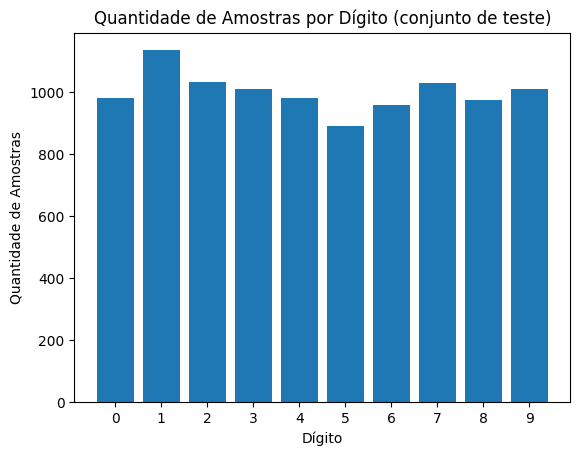

In [ ]:
unique_digits, counts = np.unique(test_labels, return_counts=True)

plt.bar(unique_digits, counts)
plt.xlabel('Dígito')
plt.ylabel('Quantidade de Amostras')
plt.title('Quantidade de Amostras por Dígito (conjunto de teste)')
plt.xticks(unique_digits)
plt.show()

In [ ]:
print(train_features.shape)

(60000, 28, 28)


In [ ]:
print(test_features.shape)

(10000, 28, 28)


#### ⚙️ Redimensionando os dados para usarmos no MLP:

In [ ]:
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

In [ ]:
train_features.shape

(60000, 784)

In [ ]:
train_labels.shape

(60000,)

#### 🏋️ Treinando...

Nesse primeiro momento vamos treinar a rede MLP em sua configuração padrão

In [ ]:
mlp = MLPClassifier(random_state=42)
clf = mlp.fit(train_features, train_labels)

In [ ]:
y_pred = clf.predict(test_features)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
class_report = classification_report(test_labels, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#### 🎯 Acurácia:

A acurácia mede a capacidade geral do modelo de reconhecer corretamente os dígitos. Ela indica a proporção de dígitos corretamente classificados em relação ao número total de dígitos.

No contexto do reconhecimento de dígitos, a acurácia é uma métrica ampla que fornece uma visão geral do desempenho do modelo em todos os dígitos. Uma alta acurácia indica que o modelo está classificando corretamente a maioria dos dígitos, enquanto uma baixa acurácia indica que o modelo está cometendo muitos erros em suas predições.

#### 🎯 Precisão:

Uma alta precisão indica que o modelo faz poucas predições incorretas de um determinado dígito, enquanto uma baixa precisão indica que o modelo está fazendo muitas predições incorretas de um dígito em relação ao total de predições positivas.

No contexto do reconhecimento de dígitos, a precisão é especialmente relevante quando o objetivo é minimizar os falsos positivos, ou seja, quando é mais importante evitar a classificação incorreta de um dígito específico do que identificar todos os exemplos desse dígito corretamente.

Portanto, a precisão em um problema de reconhecimento de dígitos fornece uma medida da capacidade do modelo de fazer predições corretas para um dígito específico em relação ao total de predições positivas desse dígito.

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acurácia da classe", class_label, ":", accuracy)

Acurácia da classe 0 : 0.9908163265306122
Acurácia da classe 1 : 0.9911894273127754
Acurácia da classe 2 : 0.9699612403100775
Acurácia da classe 3 : 0.9762376237623762
Acurácia da classe 4 : 0.9765784114052953
Acurácia da classe 5 : 0.9708520179372198
Acurácia da classe 6 : 0.9791231732776617
Acurácia da classe 7 : 0.97568093385214
Acurácia da classe 8 : 0.9630390143737166
Acurácia da classe 9 : 0.977205153617443


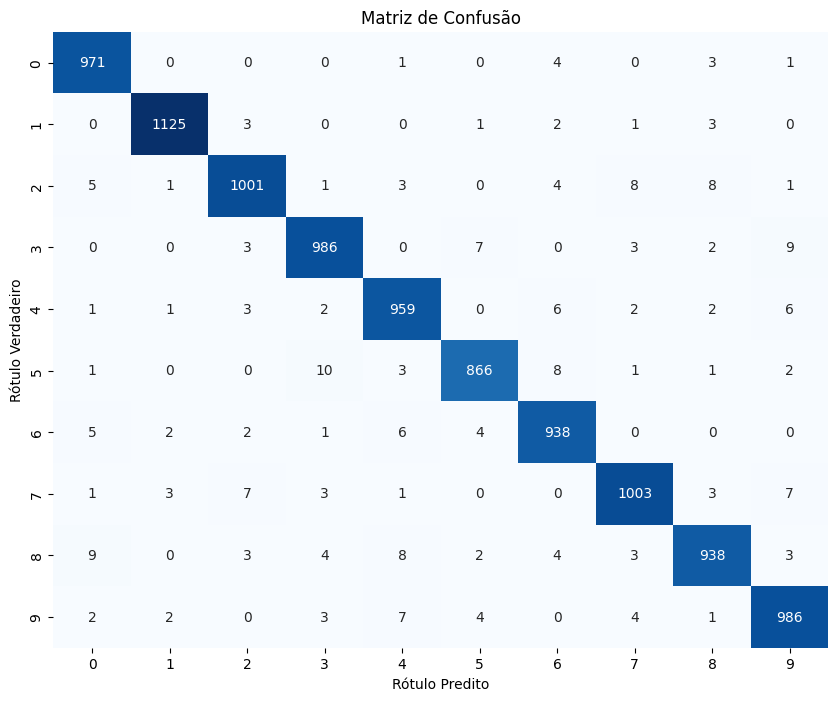

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulo Predito')
plt.ylabel('Rótulo Verdadeiro')
plt.show()

Os resultados do treinamento apenas em sua configuração padrão já são excelentes. O problema de reconhecimento de dígitos manuscritos já é trivial quando olhamos para todo o desenvolvimento da área de redes neurais e deep learning.

Sendo assim, os experimentos a seguir terão como principal objetivo entender como a variação dos hiperparâmetros pode afetar o desempenho do modelo, tanto positivamente quanto negativamente.

## Visualização dos pesos da primeira camada oculta

Neste gráfico de subplots, estamos visualizando os pesos da primeira camada oculta de um modelo de rede neural multilayer perceptron. Cada subplot representa um neurônio na camada oculta e mostra os padrões aprendidos pelo modelo para cada neurônio. A escala de cinza é utilizada para representar os valores dos pesos, onde os pixels mais claros indicam valores maiores de peso e os pixels mais escuros indicam valores menores de peso.


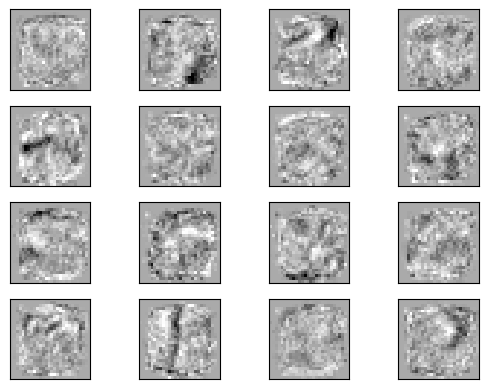

In [ ]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

#### ❌ Visualizando as predições incorretas do modelo

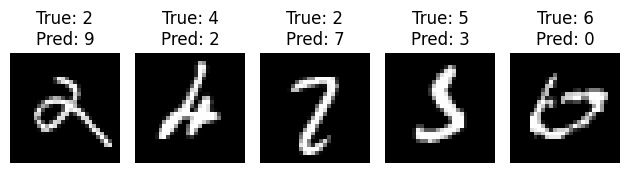

In [ ]:
incorrect_indices = np.where(y_pred != test_labels)[0]

num_samples = 5

for i in range(num_samples):
    index = incorrect_indices[i]
    image = test_features[index].reshape(28, 28)
    label = test_labels[index]
    prediction = y_pred[index]

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {label}\nPred: {prediction}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 🔋Melhorando o modelo (fine tuning) através do GridSearchCV

Existem inúmeros hiperparâmetros que podem ser ajustados em modelos, e encontrar a combinação ideal deles pode ser considerado um desafio de busca. Atualmente, há diversos algoritmos de otimização disponíveis para essa tarefa, mas uma técnica simples é a GridSearch!

Para ajustar os hiperparâmetros no scikit-learn, pode-se utilizar o método GridSearchCV, que encontra de maneira eficiente os valores ideais dos hiperparâmetros dentre os fornecidos.

*Tentamos usar essa abordagem mas tivemos problemas em relação ao tempo de computação, mesmo diminuindo o espaço de parâmetros o experimento foi prejudicado, então decidimos deixar no rolatório apenas os experimentos individuais!*

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10, 30, 10),(20,), (100, 100, 100), (100,), (30, 40, 20), (50, 80, 100)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

- hidden_layer_sizes: define o número de camadas e o número de nós que desejamos ter no classificador de rede neural. Assim, o comprimento da tupla denota o número total de camadas ocultas na rede.
- activation: indica função de ativação para as camadas ocultas.
- solver: especifica o algoritmo para otimização de peso entre os nós.
- alpha: termo de regularização, ou termo de penalidade, que combate o overfitting restringindo o tamanho dos pesos
- learning_rate: taxa de aprendizado para atualizações de peso

In [ ]:
from sklearn.model_selection import GridSearchCV

# clf_tuned = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
# clf_tuned.fit(X, y)

#### 🔎 Observando a melhor combinação de parâmetros encontrada


In [ ]:
# print('Best parameters found:\n', clf_tuned.best_params_)

In [ ]:
# clf_tuned = MLPClassifier(hidden_layer_sizes=(100,),
                            # random_state = 21,
                            # activation='relu',
                            # alpha=0.05,
                            # solver= 'sgd',
                            # early_stopping=True,
                            # learning_rate= 'constant')

#### 🔋Melhorando o modelo (fine tuning) através do experimentos isolados

Aqui vamos fazer alguns testes variando um hiperparâmetro por vez com objetivo de identificar como cada um deles pode afetar o desempenho do modelo.

### Testar variação do hiperparâmetro "learning_rate"

A taxa de aprendizado controla a velocidade com que o modelo ajusta os pesos durante o processo de treinamento.

Durante o treinamento de uma rede neural, os pesos são atualizados iterativamente com base nos gradientes calculados em relação à função de perda. A taxa de aprendizado determina o tamanho do passo que os pesos irão dar em direção ao mínimo da função de perda. Uma taxa de aprendizado alta pode fazer com que os pesos oscilem em torno do mínimo global, resultando em treinamento instável ou divergente. Por outro lado, uma taxa de aprendizado muito baixa pode fazer com que o treinamento seja lento e que o modelo fique preso em mínimos locais ou pontos de sela.

In [ ]:
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    clf = MLPClassifier(learning_rate_init=lr)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Taxa de aprendizagem: {lr}, Acurácia: {accuracy}, Precisão: {precision}")

Taxa de aprendizagem: 0.001, Acurácia: 0.9774, Precisão: 0.9774214128312355
Taxa de aprendizagem: 0.01, Acurácia: 0.9735, Precisão: 0.9735271389675955
Taxa de aprendizagem: 0.1, Acurácia: 0.9085, Precisão: 0.9242522898147454


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acurácia da classe", class_label, ":", accuracy)

Acurácia da classe 0 : 0.963265306122449
Acurácia da classe 1 : 0.9638766519823788
Acurácia da classe 2 : 0.8691860465116279
Acurácia da classe 3 : 0.8158415841584158
Acurácia da classe 4 : 0.9032586558044806
Acurácia da classe 5 : 0.852017937219731
Acurácia da classe 6 : 0.918580375782881
Acurácia da classe 7 : 0.9085603112840467
Acurácia da classe 8 : 0.946611909650924
Acurácia da classe 9 : 0.9345887016848364


### Testar variação do hiperparâmetro "hidden_layer_sizes"

O parâmetro hidden_layer_sizes permite especificar o número de camadas ocultas e o número de neurônios em cada camada. Por exemplo, [10, 20, 10] indica que a rede terá três camadas ocultas, com 10 neurônios na primeira camada, 20 neurônios na segunda camada e 10 neurônios na terceira camada.

A escolha adequada do hidden_layer_sizes depende do problema em questão e da complexidade dos dados. Geralmente, aumentar o número de camadas ocultas e o número de neurônios em cada camada pode permitir que a rede aprenda representações mais complexas dos dados, mas também pode aumentar a possibilidade de overfitting se o modelo se ajustar muito bem aos dados de treinamento.

In [ ]:
network_sizes = [[5], [100], [100, 100], [100, 100, 100]]

for size in network_sizes:

    clf = MLPClassifier(hidden_layer_sizes=size)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Tamanho da rede: {size}, Acurácia: {accuracy}, Precisão: {precision}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Tamanho da rede: [5], Acurácia: 0.8978, Precisão: 0.8976099104549987
Tamanho da rede: [100], Acurácia: 0.9771, Precisão: 0.9771283061637598
Tamanho da rede: [100, 100], Acurácia: 0.9752, Precisão: 0.9753168805024689
Tamanho da rede: [100, 100, 100], Acurácia: 0.9812, Precisão: 0.981217116356483


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acurácia da classe", class_label, ":", accuracy)

Acurácia da classe 0 : 0.9897959183673469
Acurácia da classe 1 : 0.9911894273127754
Acurácia da classe 2 : 0.9815891472868217
Acurácia da classe 3 : 0.9772277227722772
Acurácia da classe 4 : 0.9796334012219959
Acurácia da classe 5 : 0.9798206278026906
Acurácia da classe 6 : 0.9801670146137788
Acurácia da classe 7 : 0.9776264591439688
Acurácia da classe 8 : 0.9763860369609856
Acurácia da classe 9 : 0.977205153617443


Esses resultados sugerem que aumentar o tamanho da rede neural, adicionando camadas e neurônios, pode melhorar o desempenho em problemas de reconhecimento de dígitos. No entanto, é importante ter em mente que o aumento do tamanho da rede também pode levar a um aumento na complexidade do modelo e a um maior custo computacional durante o treinamento e a inferência. Portanto, é necessário encontrar um equilíbrio entre a capacidade do modelo e a eficiência computacional para obter os melhores resultados.

### Testar variação do hiperparâmetro "activation"

In [ ]:
activation_functions = ['logistic', 'tanh', 'relu']

for activation in activation_functions:
    clf = MLPClassifier(activation=activation)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Função de ativação: {activation}, Acurácia: {accuracy}, Precisão: {precision}")

Função de ativação: logistic, Acurácia: 0.9779, Precisão: 0.9779016242927013
Função de ativação: tanh, Acurácia: 0.9778, Precisão: 0.9778147403999903
Função de ativação: relu, Acurácia: 0.9793, Precisão: 0.979321498976997


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acurácia da classe", class_label, ":", accuracy)

Acurácia da classe 0 : 0.9897959183673469
Acurácia da classe 1 : 0.9903083700440528
Acurácia da classe 2 : 0.9748062015503876
Acurácia da classe 3 : 0.9811881188118812
Acurácia da classe 4 : 0.9837067209775967
Acurácia da classe 5 : 0.9753363228699552
Acurácia da classe 6 : 0.9812108559498957
Acurácia da classe 7 : 0.9776264591439688
Acurácia da classe 8 : 0.9691991786447639
Acurácia da classe 9 : 0.9682854311199207


In [ ]:
class_report = classification_report(test_labels, y_pred)
print(class_report)

### Testar variação do hiperparâmetro "solver"

In [ ]:
learning_algorithms = ['lbfgs', 'sgd', 'adam']

for algorithm in learning_algorithms:
    clf = MLPClassifier(solver=algorithm)

    clf.fit(train_features, train_labels)

    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    print(f"Algoritmo de aprendizagem: {algorithm}, Acurácia: {accuracy}, Precisão: {precision}")

Algoritmo de aprendizagem: lbfgs, Acurácia: 0.9765, Precisão: 0.976528804435195


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Algoritmo de aprendizagem: sgd, Acurácia: 0.9717, Precisão: 0.9717092284719998
Algoritmo de aprendizagem: adam, Acurácia: 0.9771, Precisão: 0.9771358685271149


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acurácia da classe", class_label, ":", accuracy)

Acurácia da classe 0 : 0.9877551020408163
Acurácia da classe 1 : 0.9894273127753304
Acurácia da classe 2 : 0.9709302325581395
Acurácia da classe 3 : 0.9762376237623762
Acurácia da classe 4 : 0.9775967413441955
Acurácia da classe 5 : 0.9775784753363229
Acurácia da classe 6 : 0.9791231732776617
Acurácia da classe 7 : 0.9688715953307393
Acurácia da classe 8 : 0.9702258726899384
Acurácia da classe 9 : 0.9722497522299306


#### Implementando e testando a variação do hiperparâmetro "drop-out"

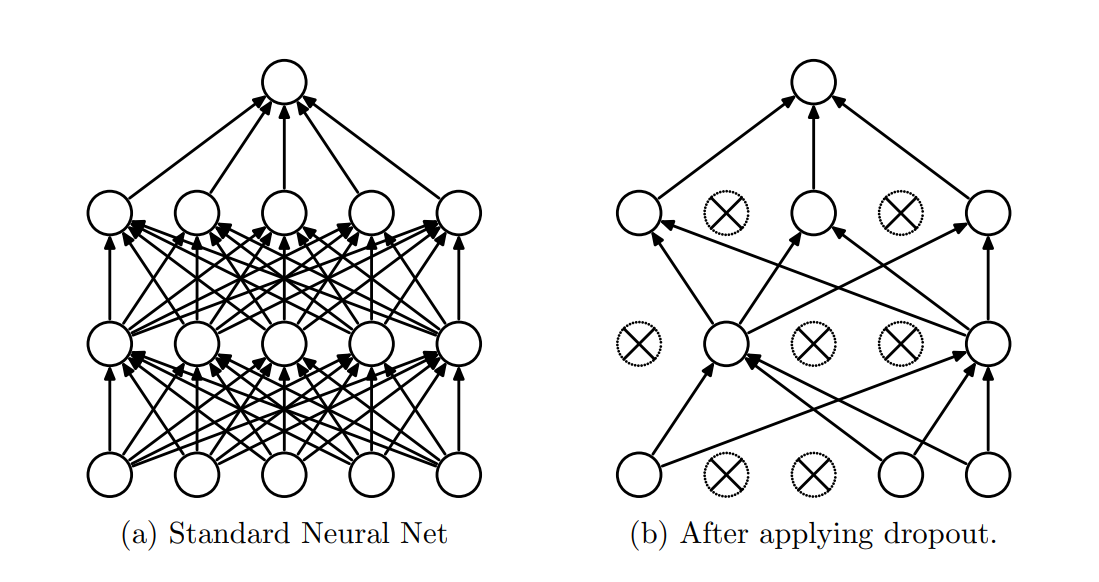

O Dropout é uma técnica de regularização amplamente utilizada em redes neurais, incluindo o contexto de redes MLP (Multilayer Perceptron). O Dropout é um método de combate ao overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não generaliza bem para novos dados.

O Dropout funciona desligando aleatoriamente um número específico de unidades de neurônios durante o treinamento de uma rede neural. Essas unidades de neurônios desligadas são temporariamente ignoradas durante o forward pass (propagação direta) e o backward pass (retropropagação) do treinamento. Isso significa que essas unidades não contribuem para o cálculo dos gradientes e, portanto, não atualizam seus pesos durante o treinamento.

Ao desligar aleatoriamente um subconjunto das unidades de neurônios em cada atualização de treinamento, o Dropout impõe uma espécie de ruído aos dados e evita que os neurônios se tornem excessivamente dependentes de outros neurônios específicos para fazerem previsões. Isso ajuda a reduzir o overfitting, pois obriga a rede neural a aprender representações mais robustas e distribuídas dos dados.

O Dropout é aplicado apenas durante o treinamento. Durante a fase de teste ou inferência, todas as unidades de neurônios são consideradas ativas, mas suas saídas são escaladas pela probabilidade de retenção utilizada durante o treinamento. Isso garante que o modelo obtenha previsões consistentes e corretas em novos dados.

In [ ]:
# Creating a custom MLPDropout classifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network._stochastic_optimizers import AdamOptimizer
from sklearn.neural_network._base import ACTIVATIONS, DERIVATIVES, LOSS_FUNCTIONS
from sklearn.utils import shuffle, gen_batches, check_random_state, _safe_indexing
from sklearn.utils.extmath import safe_sparse_dot
import warnings
from sklearn.exceptions import ConvergenceWarning

class MLPDropout(MLPClassifier):

    def __init__(
        self,
        hidden_layer_sizes=(100,),
        activation="relu",
        *,
        solver="adam",
        alpha=0.0001,
        batch_size="auto",
        learning_rate="constant",
        learning_rate_init=0.001,
        power_t=0.5,
        max_iter=200,
        shuffle=True,
        random_state=None,
        tol=1e-4,
        verbose=False,
        warm_start=False,
        momentum=0.9,
        nesterovs_momentum=True,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        n_iter_no_change=10,
        max_fun=15000,
        dropout = None,
    ):

        self.dropout = dropout
        super().__init__(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            batch_size=batch_size,
            learning_rate=learning_rate,
            learning_rate_init=learning_rate_init,
            power_t=power_t,
            max_iter=max_iter,
            shuffle=shuffle,
            random_state=random_state,
            tol=tol,
            verbose=verbose,
            warm_start=warm_start,
            momentum=momentum,
            nesterovs_momentum=nesterovs_momentum,
            early_stopping=early_stopping,
            validation_fraction=validation_fraction,
            beta_1=beta_1,
            beta_2=beta_2,
            epsilon=epsilon,
            n_iter_no_change=n_iter_no_change,
            max_fun=max_fun,
        )

    def _fit_stochastic(
        self,
        X,
        y,
        activations,
        deltas,
        coef_grads,
        intercept_grads,
        layer_units,
        incremental,
    ):
        params = self.coefs_ + self.intercepts_
        if not incremental or not hasattr(self, "_optimizer"):
            if self.solver == "sgd":
                self._optimizer = SGDOptimizer(
                    params,
                    self.learning_rate_init,
                    self.learning_rate,
                    self.momentum,
                    self.nesterovs_momentum,
                    self.power_t,
                )
            elif self.solver == "adam":
                self._optimizer = AdamOptimizer(
                    params,
                    self.learning_rate_init,
                    self.beta_1,
                    self.beta_2,
                    self.epsilon,
                )

        # early_stopping in partial_fit doesn't make sense
        early_stopping = self.early_stopping and not incremental
        if early_stopping:
            # don't stratify in multilabel classification
            should_stratify = is_classifier(self) and self.n_outputs_ == 1
            stratify = y if should_stratify else None
            X, X_val, y, y_val = train_test_split(
                X,
                y,
                random_state=self._random_state,
                test_size=self.validation_fraction,
                stratify=stratify,
            )
            if is_classifier(self):
                y_val = self._label_binarizer.inverse_transform(y_val)
        else:
            X_val = None
            y_val = None

        n_samples = X.shape[0]
        sample_idx = np.arange(n_samples, dtype=int)

        if self.batch_size == "auto":
            batch_size = min(200, n_samples)
        else:
            if self.batch_size < 1 or self.batch_size > n_samples:
                warnings.warn(
                    "Got `batch_size` less than 1 or larger than "
                    "sample size. It is going to be clipped"
                )
            batch_size = np.clip(self.batch_size, 1, n_samples)

        try:
            for it in range(self.max_iter):
                if self.shuffle:
                    # Only shuffle the sample indices instead of X and y to
                    # reduce the memory footprint. These indices will be used
                    # to slice the X and y.
                    sample_idx = shuffle(sample_idx, random_state=self._random_state)

                accumulated_loss = 0.0
                for batch_slice in gen_batches(n_samples, batch_size):
                    if self.shuffle:
                        X_batch = _safe_indexing(X, sample_idx[batch_slice])
                        y_batch = y[sample_idx[batch_slice]]
                    else:
                        X_batch = X[batch_slice]
                        y_batch = y[batch_slice]

                    activations[0] = X_batch
                    # (DROPOUT ADDITION) layer_units passed forward to help build dropout mask.
                    batch_loss, coef_grads, intercept_grads = self._backprop(
                        X_batch,
                        y_batch,
                        activations,
                        layer_units,
                        deltas,
                        coef_grads,
                        intercept_grads,
                    )
                    accumulated_loss += batch_loss * (
                        batch_slice.stop - batch_slice.start
                    )

                    # update weights
                    grads = coef_grads + intercept_grads
                    self._optimizer.update_params(params, grads)

                self.n_iter_ += 1
                self.loss_ = accumulated_loss / X.shape[0]

                self.t_ += n_samples
                self.loss_curve_.append(self.loss_)
                if self.verbose:
                    print("Iteration %d, loss = %.8f" % (self.n_iter_, self.loss_))

                # update no_improvement_count based on training loss or
                # validation score according to early_stopping
                self._update_no_improvement_count(early_stopping, X_val, y_val)

                # for learning rate that needs to be updated at iteration end
                self._optimizer.iteration_ends(self.t_)

                if self._no_improvement_count > self.n_iter_no_change:
                    # not better than last `n_iter_no_change` iterations by tol
                    # stop or decrease learning rate
                    if early_stopping:
                        msg = (
                            "Validation score did not improve more than "
                            "tol=%f for %d consecutive epochs."
                            % (self.tol, self.n_iter_no_change)
                        )
                    else:
                        msg = (
                            "Training loss did not improve more than tol=%f"
                            " for %d consecutive epochs."
                            % (self.tol, self.n_iter_no_change)
                        )

                    is_stopping = self._optimizer.trigger_stopping(msg, self.verbose)
                    if is_stopping:
                        break
                    else:
                        self._no_improvement_count = 0

                if incremental:
                    break

                if self.n_iter_ == self.max_iter:
                    warnings.warn(
                        "Stochastic Optimizer: Maximum iterations (%d) "
                        "reached and the optimization hasn't converged yet."
                        % self.max_iter,
                        ConvergenceWarning,
                    )
        except KeyboardInterrupt:
            warnings.warn("Training interrupted by user.")

        if early_stopping:
            # restore best weights
            self.coefs_ = self._best_coefs
            self.intercepts_ = self._best_intercepts

    def _backprop(self, X, y, activations, layer_units, deltas, coef_grads, intercept_grads):

        n_samples = X.shape[0]
        dropout_masks = None

        # Create the Dropout Mask (DROPOUT ADDITION)
        if self.dropout != None:
            if 0 < self.dropout < 1:
                keep_probability = 1 - self.dropout
                dropout_masks = [np.ones(layer_units[0])]

                # Create hidden Layer Dropout Masks
                for units in layer_units[1:-1]:
                    # Create inverted Dropout Mask, check for random_state
                    if self.random_state != None:
                        layer_mask = (self._random_state.random(units) < keep_probability).astype(int) / keep_probability
                    else:
                        layer_mask = (np.random.rand(units) < keep_probability).astype(int) / keep_probability
                    dropout_masks.append(layer_mask)
            else:
                raise ValueError('Dropout must be between zero and one. If Dropout=X then, 0 < X < 1.')

        # Forward propagate
        # Added dropout_makss to _forward_pass call (DROPOUT ADDITION)
        activations = self._forward_pass(activations, dropout_masks)

        # Get loss
        loss_func_name = self.loss
        if loss_func_name == "log_loss" and self.out_activation_ == "logistic":
            loss_func_name = "binary_log_loss"
        loss = LOSS_FUNCTIONS[loss_func_name](y, activations[-1])
        # Add L2 regularization term to loss
        values = 0
        for s in self.coefs_:
            s = s.ravel()
            values += np.dot(s, s)
        loss += (0.5 * self.alpha) * values / n_samples

        # Backward propagate
        last = self.n_layers_ - 2

        # The calculation of delta[last] here works with following
        # combinations of output activation and loss function:
        # sigmoid and binary cross entropy, softmax and categorical cross
        # entropy, and identity with squared loss
        deltas[last] = activations[-1] - y

        # Compute gradient for the last layer
        self._compute_loss_grad(
            last, n_samples, activations, deltas, coef_grads, intercept_grads
        )

        inplace_derivative = DERIVATIVES[self.activation]
        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 2, 0, -1):
            deltas[i - 1] = safe_sparse_dot(deltas[i], self.coefs_[i].T)
            inplace_derivative(activations[i], deltas[i - 1])

            self._compute_loss_grad(
                i - 1, n_samples, activations, deltas, coef_grads, intercept_grads
            )

        # Apply Dropout Masks to the Parameter Gradients (DROPOUT ADDITION)
        if dropout_masks != None:
            for layer in range(len(coef_grads)-1):
                mask = (~(dropout_masks[layer+1] == 0)).astype(int)
                coef_grads[layer] = coef_grads[layer] * mask[None, :]
                coef_grads[layer+1] = (coef_grads[layer+1] * mask.reshape(-1, 1))
                intercept_grads[layer] = intercept_grads[layer] * mask

        return loss, coef_grads, intercept_grads

    def _forward_pass(self, activations, dropout_masks=None):

        hidden_activation = ACTIVATIONS[self.activation]
        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 1):
            activations[i + 1] = safe_sparse_dot(activations[i], self.coefs_[i])
            activations[i + 1] += self.intercepts_[i]

            # For the hidden layers
            if (i + 1) != (self.n_layers_ - 1):
                hidden_activation(activations[i + 1])

            # Apply Dropout Mask (DROPOUT ADDITION)
            if (i + 1) != (self.n_layers_ - 1) and dropout_masks != None:
                check1 = activations[i].copy()
                activations[i+1] = activations[i+1] * dropout_masks[i+1][None, :]

        # For the last layer
        output_activation = ACTIVATIONS[self.out_activation_]
        output_activation(activations[i + 1])
        return activations

In [ ]:
droup_out = [0.1, 0.3, 0.5]

for dp in droup_out:

    clf = MLPDropout(dropout=dp)

    # 4.2. Treinar o modelo com os dados de treinamento
    clf.fit(train_features, train_labels)

    # 4.3. Avaliar o desempenho do modelo usando os dados de teste
    y_pred = clf.predict(test_features)
    accuracy = clf.score(test_features, test_labels)
    precision = precision_score(test_labels, y_pred, average='weighted')

    # 4.4. Imprimir os resultados (algoritmo de aprendizagem, acurácia e precisão)
    print(f"Drop-out: {dp}, Acurácia: {accuracy}, Precisão: {precision}")

Drop-out: 0.1, Acurácia: 0.9813, Precisão: 0.9813178978393705
Drop-out: 0.3, Acurácia: 0.9798, Precisão: 0.9798641923622965
Drop-out: 0.5, Acurácia: 0.9754, Precisão: 0.9754695830621806


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test_labels, y_pred)
class_accuracy = matrix.diagonal()/matrix.sum(axis=1)

for class_label, accuracy in enumerate(class_accuracy):
    print("Acurácia da classe", class_label, ":", accuracy)

Acurácia da classe 0 : 0.986734693877551
Acurácia da classe 1 : 0.986784140969163
Acurácia da classe 2 : 0.9835271317829457
Acurácia da classe 3 : 0.9782178217821782
Acurácia da classe 4 : 0.9775967413441955
Acurácia da classe 5 : 0.9674887892376681
Acurácia da classe 6 : 0.9801670146137788
Acurácia da classe 7 : 0.9708171206225681
Acurácia da classe 8 : 0.9620123203285421
Acurácia da classe 9 : 0.958374628344896


O trade-off relacionado à quantidade de regularização aplicada ao modelo:

Valores baixos de dropout podem permitir que o modelo se ajuste melhor aos dados de treinamento, mas com maior risco de overfitting. Valores altos de dropout podem aumentar a capacidade de generalização, mas com o custo de reduzir a capacidade de ajuste aos dados de treinamento.

A escolha do valor adequado de dropout depende do conjunto de dados, da complexidade do problema e da arquitetura da rede neural. É comum realizar experimentos com diferentes valores de dropout para encontrar um equilíbrio adequado entre a capacidade de aprendizado e a regularização.

No entanto, houve pouca variação no desempenho para os valores de drop out usados, todos os resultados são ótimos para o problema em questão.